In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1

Постройте график
<br>
Назовите график
<br>
Сделайте именование оси x и оси y
<br>
Сделайте выводы

### 1.1 Скачать данные

In [4]:
hd = pd.read_csv('D:\Learning\Lects & Sems\Основы языка Python для аналитиков\Sems\Sem2\Homework\kc_house_data.csv')

In [5]:
hd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

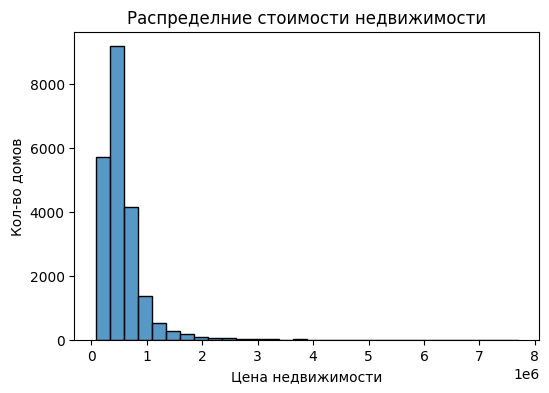

In [15]:
plt.figure(figsize=(6,4))

sns.histplot(x=hd['price'], bins=30)
plt.title('Распределние стоимости недвижимости')
plt.xlabel('Цена недвижимости')
plt.ylabel('Кол-во домов');

#### _Вывод_:
Цена на большую часть домов (93%) не превышает 1 млн.


In [39]:
hd[hd['price'] < 1000000].shape[0] / (hd['price'].count())

0.9309674732799704

### 1.3 Изучите распределение квадратуры жилой

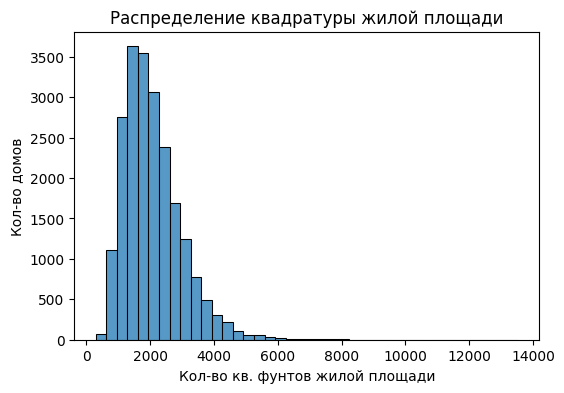

In [40]:
plt.figure(figsize=(6,4))

sns.histplot(x=hd['sqft_living'], bins=40)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Кол-во кв. футов жилой площади')
plt.ylabel('Кол-во домов');

#### _Вывод_:
Наибольшее количество домов имеют от 1300 до 2000 квадратных футов жилой площади.


### 1.4 Изучите распределение года постройки

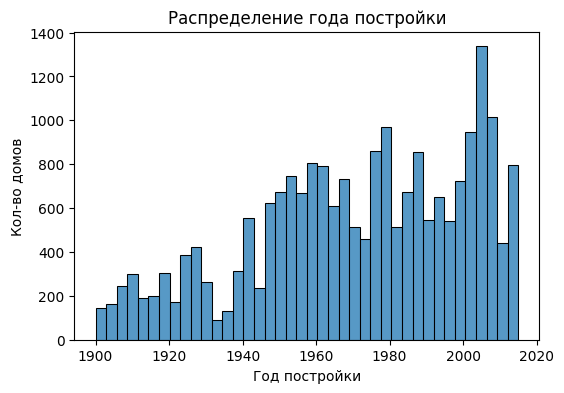

In [42]:
plt.figure(figsize=(6,4))

sns.histplot(x=hd['yr_built'], bins=40)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

#### _Вывод_:
Наибольшее количество домов было построено в промежутке с 2003 по 2006 год. За рассматриваемый период наблюдается тенденция увеличения количества ввода нового жилья.



## Задание 2


### 2.1 Изучите распределение домов от наличия вида на набережную

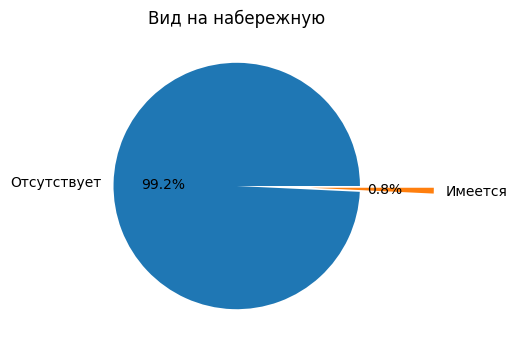

In [73]:
plt.figure(figsize=(6,4))
expl = [0, 0.6]
waterfront = hd["waterfront"].value_counts()
names = ('Отсутствует','Имеется')
values = waterfront.values
plt.pie(values, labels=names, autopct='%1.1f%%', explode=expl)
plt.title('Вид на набережную');


#### _Вывод_:
Вид на набережную имеется менее чем у 1% домов.



### 2.2 Изучите распределение этажей домов

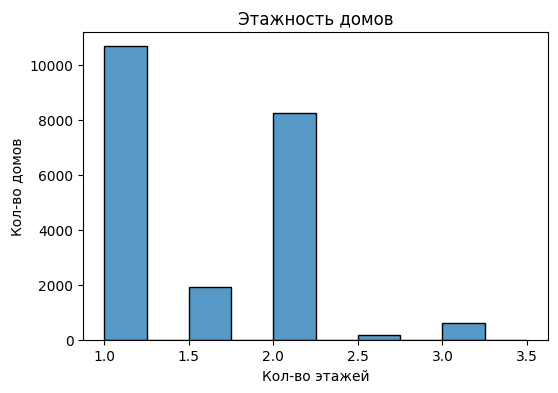

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(x=hd['floors'], bins=10)
plt.title('Этажность домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

#### _Вывод_:
Подавляющее большинство домов имеют 1 или 2 этажа.



### 2.3 Изучите распределение состояния домов

In [76]:
cond = hd.condition.value_counts().reset_index()
cond.head()

,condition,count
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


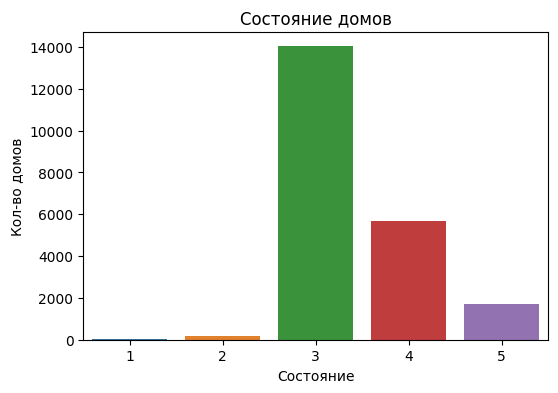

In [85]:
plt.figure(figsize=(6,4))

sns.barplot(x=cond['condition'], y=cond['count'])

plt.title('Состояние домов')
plt.xlabel('Состояние')
plt.ylabel('Кол-во домов');

#### _Вывод_:
Большая часть домов имеет удовлетворительное состояние.



## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [95]:
new_hd = hd.drop(columns= ['id', 'date', ])

corr_matrix = new_hd.corr()
corr_matrix[np.abs(corr_matrix)<=0.3] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.000000,0.000000,0.000000,0.397293,0.000000,0.667434,0.605567,0.323816,0.000000,0.0,0.000000,0.307003,0.000000,0.585379,0.000000
bedrooms,0.308350,1.000000,0.515884,0.576671,0.000000,0.000000,0.000000,0.000000,0.000000,0.356967,0.477600,0.303093,0.000000,0.0,0.000000,0.000000,0.000000,0.391638,0.000000
bathrooms,0.525138,0.515884,1.000000,0.754665,0.000000,0.500653,0.000000,0.000000,0.000000,0.664983,0.685342,0.000000,0.506019,0.0,0.000000,0.000000,0.000000,0.568634,0.000000
sqft_living,0.702035,0.576671,0.754665,1.000000,0.000000,0.353949,0.000000,0.000000,0.000000,0.762704,0.876597,0.435043,0.318049,0.0,0.000000,0.000000,0.000000,0.756420,0.000000
sqft_lot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.718557
floors,0.000000,0.000000,0.500653,0.353949,0.000000,1.000000,0.000000,0.000000,0.000000,0.458183,0.523885,0.000000,0.489319,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
waterfront,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.401857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
view,0.397293,0.000000,0.000000,0.000000,0.000000,0.000000,0.401857,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
condition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.361417,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
grade,0.667434,0.356967,0.664983,0.762704,0.000000,0.458183,0.000000,0.000000,0.000000,1.000000,0.755923,0.000000,0.446963,0.0,0.000000,0.000000,0.000000,0.713202,0.000000


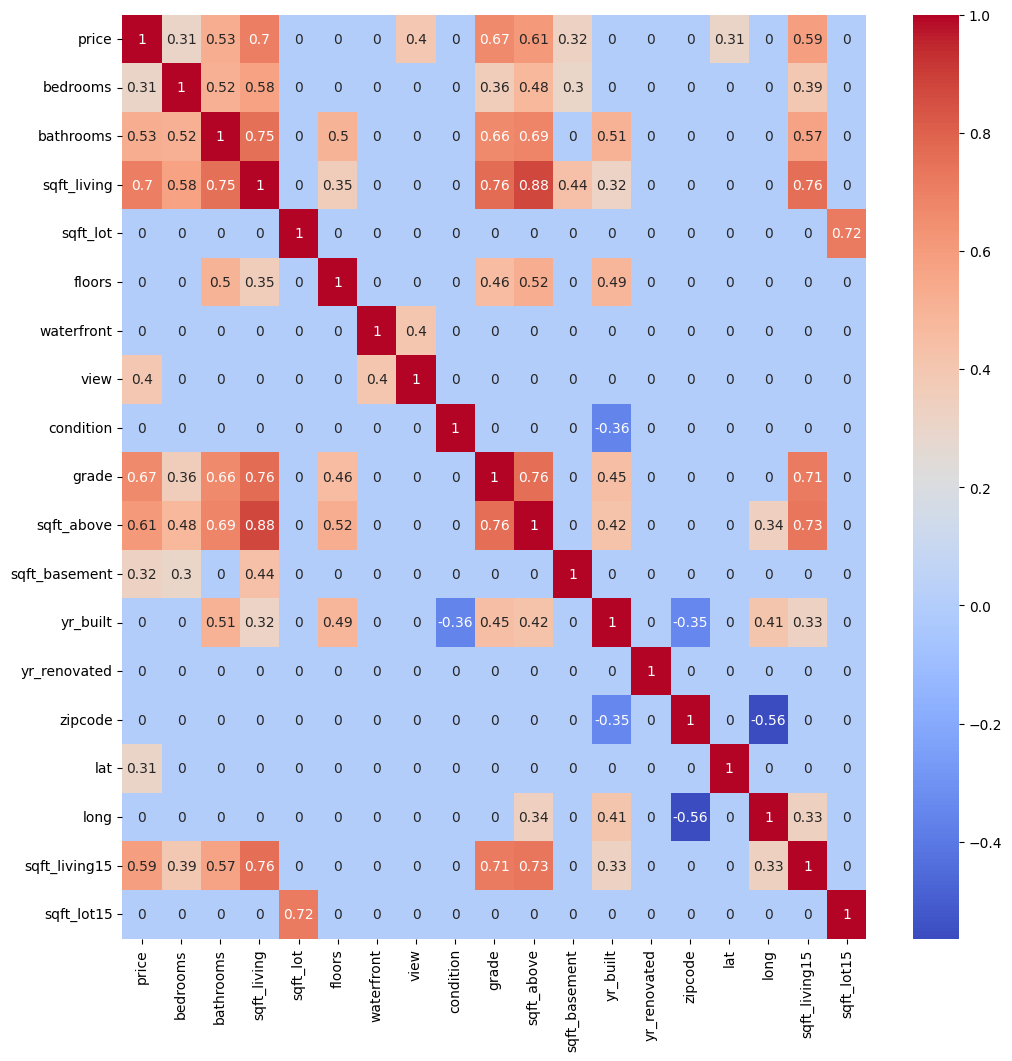

In [96]:
plt.figure(figsize= (12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

### 3.1 Жилая площадь дома
 Как мы видим из таблицы - наиболее сильное влияние на цену оказывает жилая площадь дома. Исследуем данную взаимосвязь с помощью диаграммы рассеивания:

<Figure size 600x400 with 0 Axes>

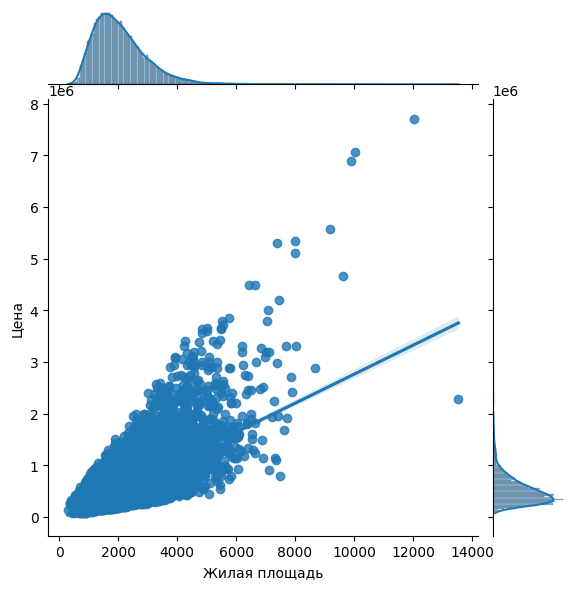

In [116]:
plt.figure(figsize=(6,4))

sns.jointplot(x=hd['sqft_living'], y=hd['price'], kind='reg')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена');


#### _Вывод_:
На графике отчетливо видно сильную взаимосвязь стоимости жилья от количества квадратных футов жилой площади.



### 3.2 Грейд
Следующая по силе характеристика, имеющая влияние на цену - грейд. Однако, грейд является внешней оценкой, основанной на системе классифицирования недвижимости, поэтому, вероятнее всего, грейд уже включает в себя оценку всех остальных факторов от внешнего наблюдателя (например, рейтингового агенства). Ради любопытства, попробуем построить боксплоты по имеющимся данным:

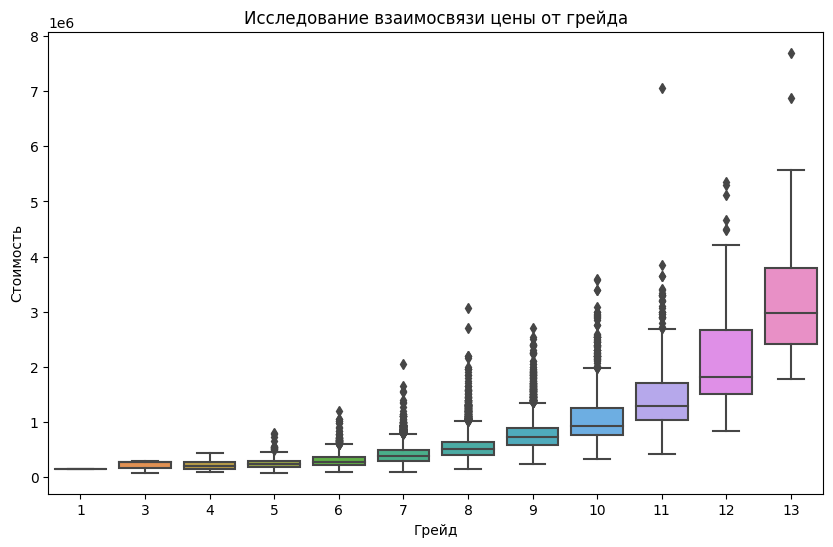

In [118]:
plt.figure(figsize= (10, 6))
sns.boxplot(x=hd['grade'], y=hd['price'], whis=1.5)
plt.title('Исследование взаимосвязи цены от грейда')
plt.xlabel('Грейд')
plt.ylabel('Стоимость');

#### _Вывод_:
Действительно, на графике прослеживается взаимосвязь между ценой и грейдом.



### 3.3 "sqft_above" и "sqft_living15"

Данные характеристики являются по своей сути вариацией площади объекта, поэтому рассматривать повторно их не будем.

### 3.4 Ванные комнаты

Коэффициент корреляции цены и количества ванных комнат показывает среднюю взаимосвязь между этими характеристиками.

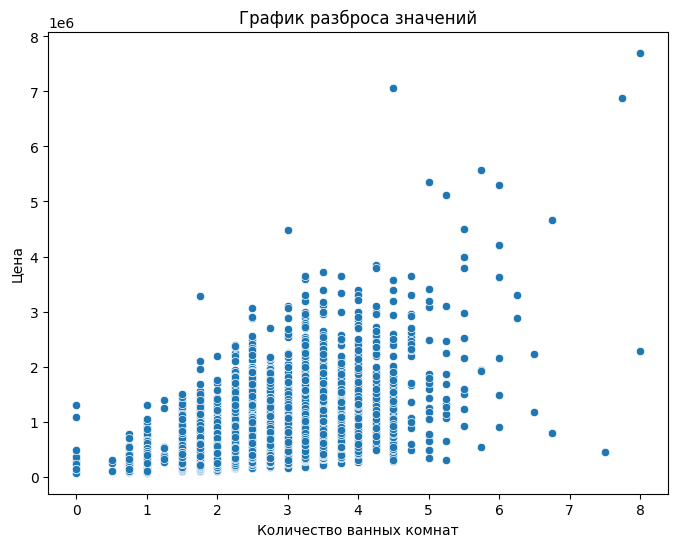

In [113]:
plt.figure(figsize=(8,6))

sns.scatterplot(x=hd['bathrooms'], y=hd['price'])
plt.title('График разброса значений')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Цена');


#### _Вывод_:
На графике в самом деле прослеживается взаимосвязь между ценой и количеством ванных комнат, хоть она и слабее предыдущих.



### 3.5 "View"

На уроке _**"view"**_ описывали как __*"вид"*__, хотя [данный источик](https://dataplatform.cloud.ibm.com/data/notebooks/converter/assets/79a436d6-51b7-4cb3-962d-5d2bbcb37e78?access_token=025031e1b7902891194b22266aee25230c88c44cfbb55cf3db2e0a7b712c7017&project=87db0240-1cfa-47f3-8b98-396d95cf2671) описывает этот признак как количество просмотров (видимо, покупателями). Несмотря на это, связь между ценой и признаком слабая, попробуем ее исследовать с помощью боксплотов:

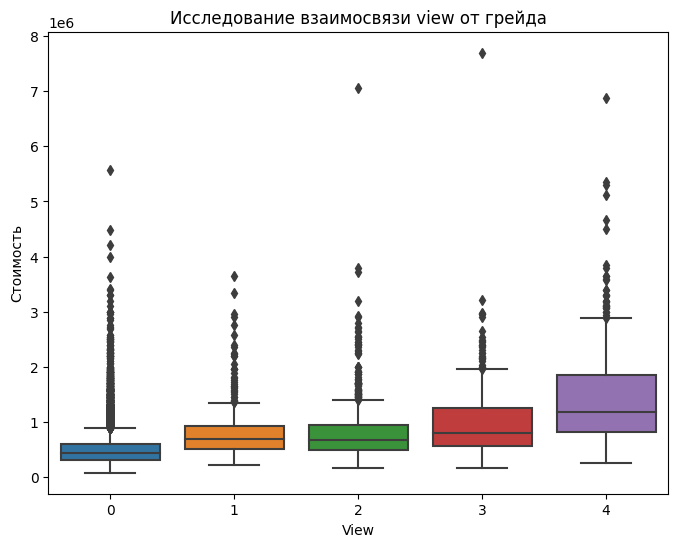

In [121]:
plt.figure(figsize= (8, 6))
sns.boxplot(x=hd['view'], y=hd['price'], whis=1)
plt.title('Исследование взаимосвязи view от грейда')
plt.xlabel('View')
plt.ylabel('Стоимость');

#### _Вывод_:
В общем и целом график подтверждает результат матрицы корреляций о наличии слабой взаимосвязи между признаками.


### Итог:
В результате проведенного анализа можно сказать, что наибольшее влияние на цену оказывает количество квадратных футов жилой площади.